In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
dataset=fetch_california_housing()

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
dataset.data.shape

(20640, 8)

In [10]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
x_train0,x_test,y_train0,y_test=train_test_split(dataset['data'],dataset['target'])

In [18]:
x_train1,x_validation,y_train1,y_validation=train_test_split(
    x_train0,y_train0
)

In [20]:
st=StandardScaler()

In [22]:
x_train_s=st.fit_transform(x_train1)

In [23]:
x_train_s

array([[ 0.33627779, -1.00334779,  0.32744057, ...,  0.06679652,
        -1.27392305,  1.20924433],
       [-0.71724423, -0.44657938, -0.20185051, ...,  0.25756884,
        -0.94215503,  1.68313673],
       [-0.24688189,  0.26926573, -0.85372377, ..., -0.05624043,
        -0.84402645,  0.81017705],
       ...,
       [ 0.29319077,  0.42834242, -0.15958764, ..., -0.03634047,
         1.09985381, -1.3597513 ],
       [-1.02807517, -0.128426  , -0.25020322, ..., -0.07546085,
         2.28674224, -1.81867868],
       [ 1.57136968,  0.18972738,  0.416537  , ..., -0.04614037,
        -0.58235027, -0.08772434]])

In [24]:
x_validation_s=st.fit_transform(x_validation)

In [26]:
x_test_s=st.transform(x_test)

In [27]:
model=keras.models.Sequential([
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [35]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer='sgd',
              metrics=keras.metrics.mean_squared_error)

In [36]:
model.fit(x_train_s,y_train1,epochs=5,validation_data=(x_validation_s,y_validation))

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 0.3663 - val_mean_squared_error: 0.3663
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3267 - mean_squared_error: 0.3267 - val_loss: 0.3674 - val_mean_squared_error: 0.3674
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3223 - mean_squared_error: 0.3223 - val_loss: 0.3636 - val_mean_squared_error: 0.3636
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3199 - mean_squared_error: 0.3199 - val_loss: 0.3657 - val_mean_squared_error: 0.3657


In [39]:
model.history.history

{'loss': [0.3293815851211548,
  0.32665470242500305,
  0.324179083108902,
  0.3223487436771393,
  0.31988611817359924],
 'mean_squared_error': [0.3293815851211548,
  0.32665470242500305,
  0.324179083108902,
  0.3223487436771393,
  0.31988611817359924],
 'val_loss': [0.366347998380661,
  0.36735963821411133,
  0.35799214243888855,
  0.3636201322078705,
  0.36572733521461487],
 'val_mean_squared_error': [0.366347998380661,
  0.36735963821411133,
  0.35799214243888855,
  0.3636201322078705,
  0.36572733521461487]}

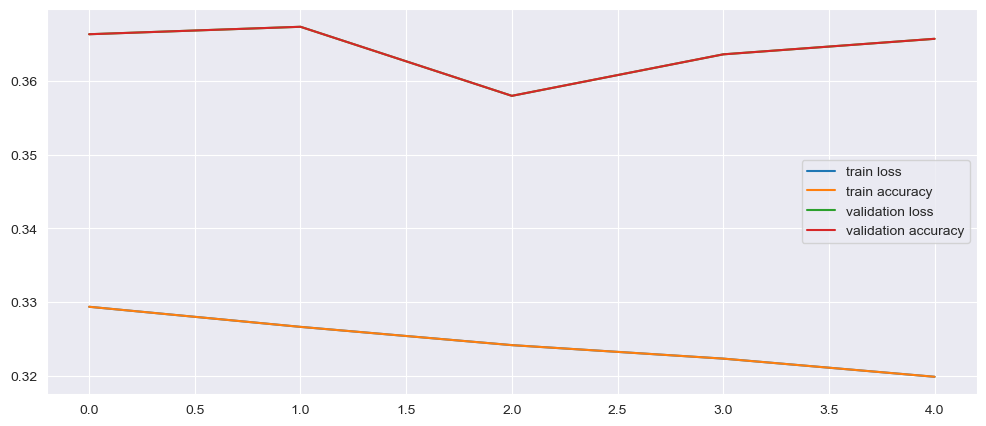

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(model.history.history["loss"], label="train loss")
ax.plot(model.history.history["mean_squared_error"], label="train accuracy")
ax.plot(model.history.history["val_loss"], label="validation loss")
ax.plot(model.history.history["val_mean_squared_error"], label="validation accuracy")
ax.legend()